##Scatter plot customization

In [1]:
import pandas as pd
import ast
import matplotlib.pyplot as plt
from datasets import load_dataset
dataset=load_dataset('lukebarousse/data_jobs')
df= dataset["train"].to_pandas()
df['job_posted_date']=pd.to_datetime(df['job_posted_date'])
df['job_skills']=df['job_skills'].apply(lambda skill_list: ast.literal_eval(skill_list) if pd.notna(skill_list) else skill_list )

c:\Users\Chira\.conda\envs\python_course\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


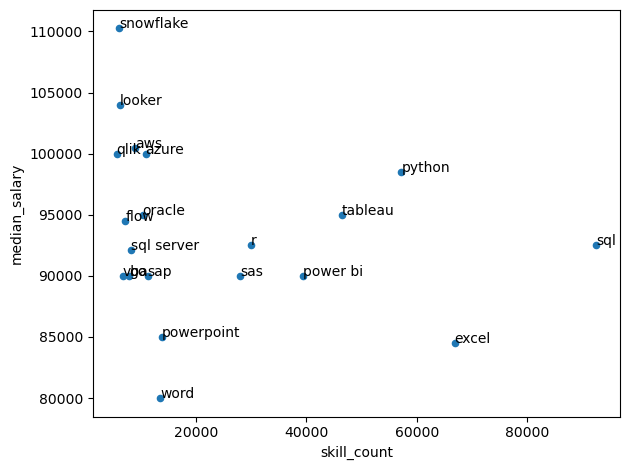

In [2]:
df=df[df['job_title_short']=='Data Analyst']
df_explode= df.explode('job_skills')
skill_count=20
df_explode=df_explode.groupby('job_skills').agg(skill_count=('job_skills','count'),median_salary=('salary_year_avg','median')).sort_values(by='skill_count', ascending=False).head(skill_count)
df_explode.plot(kind='scatter',x='skill_count',y='median_salary')

for i , txt in enumerate(df_explode.index):
    plt.text(df_explode['skill_count'].iloc[i],df_explode['median_salary'].iloc[i], txt)
plt.tight_layout()
plt.show()    

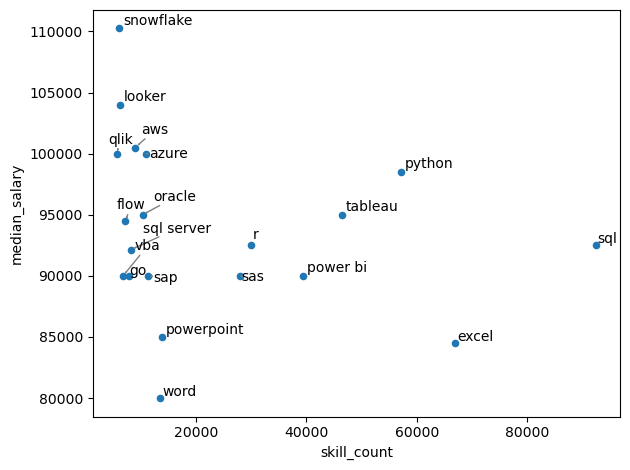

In [11]:
from adjustText import adjust_text
df_explode.plot(kind='scatter',x='skill_count',y='median_salary')
text=[]
for i , txt in enumerate(df_explode.index):
    text.append(plt.text(df_explode['skill_count'].iloc[i],df_explode['median_salary'].iloc[i], txt))
adjust_text(text, arrowprops=dict(arrowstyle='->', color='gray', lw=1))    
plt.tight_layout()
plt.show()    